In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from diffeqs import *
sys.path.append(os.path.join('..', 'importantfunctions'))
from ODEsolvers import *
import matplotlib.animation as animation

In [82]:
def animate(Ts,Rs,colors,trailing=True,filename=None):
    #colors needs to be something like colors = [["lightpink", "deeppink"],["lightgreen", "green"],["lightblue", "blue"]]
    
    numobjects=Rs.shape[1]//4 #because four fields per object and want it to be an int

    #create lists of arrays for coordinates
    Xs=[]
    Ys=[]
    for i in range(numobjects):
        Xs.append(Rs[:,4*i])
        Ys.append(Rs[:,4*i+1])
        
    fig,ax=plt.subplots()
    
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_title(f'Evolution of the {numobjects} Objects')
    
    #set the limits of the plot to be the range of the points with a buffer zone
    allX=np.concatenate(Xs)
    allY=np.concatenate(Ys)
    Xmax=allX.max()
    Xmin=allX.min()
    Ymax=allY.max()
    Ymin=allY.min()
    width=Xmax-Xmin
    height=Ymax-Ymin
    ax.set_xlim(Xmin-0.1*width,Xmax+0.1*width)
    ax.set_ylim(Ymin-0.1*height,Ymax+0.1*height)
    
    # want 1000 frames for the gif
    step = round(len(Ts)/1000)
    frame_indices = range(0, len(Ts), step)
    line_step=step//10 

    if trailing==True:
        trail_length=step*50
    
    #initialize empty line and scatter plots
    lines = []
    scatters = []
    for i in range(numobjects):
        line_color = colors[i][0]
        scatter_color = colors[i][1]
        line, = ax.plot([], [], color=line_color, zorder=2)
        scatter = ax.scatter([], [], color=scatter_color, zorder=3)
        lines.append(line)
        scatters.append(scatter)
    
    def animate(frame):
        index=frame*step

        for i in range(numobjects):
            Xi=Xs[i]
            Yi=Ys[i]
    
            if trailing==False:
                lines[i].set_data(Xi[:index+1:line_step],Yi[:index+1:line_step])
            elif trailing==True:
                startindex=index-trail_length
                if startindex<0:
                    startindex=0
                lines[i].set_data(Xi[startindex:index+1:line_step],Yi[startindex:index+1:line_step])
            
            scatters[i].set_offsets([[Xi[index], Yi[index]]])
        
        return lines+scatters
    
    anim=animation.FuncAnimation(fig,animate,frames=len(frame_indices),
                                 interval=50,repeat=True,blit=True)
    if filename is not None:
        anim.save(f'{filename}.gif',writer='pillow',fps=20)

In [10]:
R01=np.array([-1,0,0.306893,0.125507])
R02=np.array([1,0,0.306893,0.125507])
R03=np.array([0,0.3133550361,-0.613786,-0.251014])
R0=np.concatenate([R01,R02,R03])

In [19]:
#Ts,Rs=RK4(threestars,R0,h=0.00001,maxt=7) #period is 6.234671

In [32]:
#Rs.shape

(700001, 12)

In [46]:
# Xs=[]
# Ys=[]
# for i in range(3):
#     Xs.append(Rs[:,4*i])
#     Ys.append(Rs[:,4*i+1])

In [48]:
#Xs

[array([-1.        , -0.99999386, -0.99998772, ...,  0.1746665 ,
         0.17467516,  0.17468382]),
 array([ 1.        ,  1.00000614,  1.00001228, ..., -0.1090938 ,
        -0.10909621, -0.10909863]),
 array([ 0.00000000e+00, -1.22757200e-05, -2.45514400e-05, ...,
        -6.55727018e-02, -6.55789489e-02, -6.55851949e-02])]

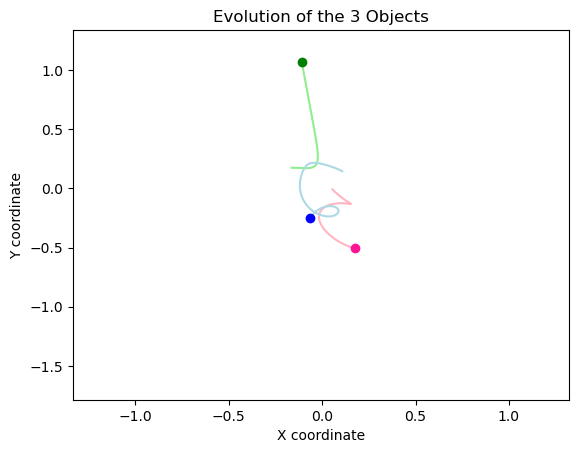

In [58]:
colors = [["lightpink", "deeppink"],["lightgreen", "green"],["lightblue", "blue"]]
animate(Ts,Rs,colors,filename='test3')

In [64]:
R01=np.array([1,0,0,0.57735])
R02=np.array([-0.5,np.sqrt(3)/2,-0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
R03=np.array([-0.5,-np.sqrt(3)/2,0.5*np.sqrt(1/3),-np.sqrt(3)/2*np.sqrt(1/3)])
#this came from ChatGPT as a suggestion for the starting parameters of the planet 
#after testing I modified the planet velocity by *0.8 so it wouldn't fly away 
# Center of mass of stars
com = (R01[:2] + R02[:2] + R03[:2]) / 3
planet0_pos = com + np.array([2.0, 0.0])  # place planet 2 units to the right of COM

# approximate circular velocity
M_total = 3.0
r = np.linalg.norm(planet0_pos - com)
G=1
v_circ = np.sqrt(G * M_total / r)

# velocity perpendicular to radius vector (positive y-direction here)
planet0_vel = np.array([0.0, v_circ])
planet0 = np.concatenate([planet0_pos, planet0_vel*0.8])
R0=np.concatenate([R01,R02,R03,planet0])

In [70]:
h=0.00001
Ts,Rs=RK4(threestarsandplanet,R0,h=h,N=1000000)

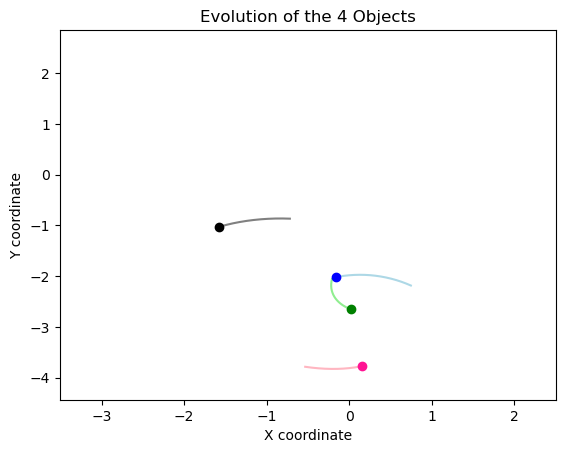

In [80]:
colors = [["lightpink", "deeppink"],["lightgreen", "green"],["lightblue", "blue"],["gray","black"]]
animate(Ts,Rs,colors,filename='test4')

In [85]:
def plot(Ts,Rs,colors,filename=None):
    #colors should be something like colors=["deeppink","green","blue"]

    numobjects=Rs.shape[1]//4 #because four fields per object and want it to be an int

    #create lists of arrays for coordinates
    Xs=[]
    Ys=[]
    for i in range(numobjects):
        Xs.append(Rs[:,4*i])
        Ys.append(Rs[:,4*i+1])

    fig,ax=plt.subplots()

    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
    ax.set_title(f'Paths of the {numobjects} Objects')

    #set the limits of the plot to be the range of the points with a buffer zone
    allX=np.concatenate(Xs)
    allY=np.concatenate(Ys)
    Xmax=allX.max()
    Xmin=allX.min()
    Ymax=allY.max()
    Ymin=allY.min()
    width=Xmax-Xmin
    height=Ymax-Ymin
    ax.set_xlim(Xmin-0.1*width,Xmax+0.1*width)
    ax.set_ylim(Ymin-0.1*height,Ymax+0.1*height)

    line_step=len(Ts)//10000 #only do this many points
    for i in range(numobjects):
        line_color = colors[i]
        ax.plot(Xs[i][::line_step], Ys[i][::line_step], color=line_color)

    if filename is not None:
        fig.savefig(f'{filename}.png')

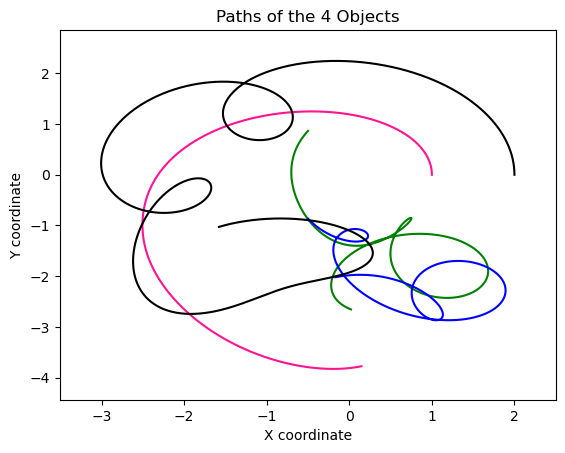

In [87]:
colors=["deeppink","green","blue","black"]
plot(Ts,Rs,colors,filename='plot1')